In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
train_data = pd.read_csv("Data/CE802_P3_Data.csv",sep=',')
test_data = pd.read_csv("Data/CE802_P3_Test.csv",sep=',')
file_name="Data/CE802_P3_Test_LR.csv"


Bad key "text.kerning_factor" on line 4 in
C:\Conda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,Very high,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,Medium,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,Medium,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,Very high,-22863.72,-3.12,-54.36,2424.42,109.19


In [3]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,NaN


In [4]:
cleanup = {"F12": {"Very low":0, "Low":1, "Medium":2, "High":3, "Very high":4}}
train_data = train_data.replace(cleanup)
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,3,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,0,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,1,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,1,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,0,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,4,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,2,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,2,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,4,-22863.72,-3.12,-54.36,2424.42,109.19


In [5]:
test = test_data.replace(cleanup)
test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,1,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,2,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,1,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,3,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,1,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,4,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,0,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,1,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,2,-13748.25,-9.21,-18.96,1261.38,NaN


In [6]:
cleanup = {"F4": {"UK":1, "USA":2, "Europe":3, "Rest":4}}
train_data = train_data.replace(cleanup)
train_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,4,-98.88,529.56,4.54,379.54,1,1,7.30,3,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,4,-59.22,493.11,0.05,402.78,5,3,-1.28,0,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,1,-228.48,563.79,1.22,147.35,4,4,8.28,1,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,1,-173.28,536.94,0.25,113.49,4,3,6.26,1,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,2,-193.14,617.52,9.15,343.64,8,6,-6.88,0,-14434.13,-9.45,-46.14,1435.90,373.56


In [7]:
test = test.replace(cleanup)
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,2,-280.95,581.10,0.06,214.35,2,2,-0.88,1,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,4,-228.00,330.54,0.31,-164.98,1,9,0.28,2,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,4,-59.67,662.28,4.98,281.54,6,5,5.82,1,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,1,-211.23,506.55,0.57,-311.96,7,5,1.92,3,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,4,-284.82,649.41,0.05,291.47,8,3,-0.02,1,-9901.41,-13.47,-48.81,2251.04,NaN


In [8]:
X = train_data.drop('Target', axis=1)
y = train_data['Target']

X_test=test.drop('Target',axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid =train_test_split(X, y,  random_state=1, test_size = 0.2)

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train,y_train)      
 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
cv_score = cross_val_score(lr, X, y, cv = 5,scoring='r2')
print("CV mean score: ", cv_score.mean())

CV mean score:  0.7164871900333476


In [13]:
y_predict = lr.predict(X_valid)   
mae = sum((y_predict - y_valid)**2) /len(y_predict)

print(mae)

315530.9023377809


In [14]:
y_predict

array([ 4.41166435e+02,  6.50252726e+02, -8.63020720e+02,  7.09387783e+02,
       -3.59257056e+02, -1.25229634e+02,  2.13772233e+02,  2.13675594e+03,
        1.13487264e+03,  7.24115194e+02, -3.18770092e+02,  3.73179285e+02,
        6.73835496e+02,  1.26948703e+02,  1.61040550e+03,  7.64599791e+02,
        1.36305147e+03,  1.11051253e+03,  5.16203359e+02,  1.78199126e+02,
        1.01971523e+03,  2.26126961e+03,  1.93201891e+03,  1.66636599e+03,
        3.31176871e+02, -1.62531568e+03, -1.14518556e+03,  7.11652598e+02,
        4.77884622e+02,  6.82266910e+02,  3.84803681e+03,  1.96562960e+03,
       -1.72607278e-01,  1.13568407e+03,  1.06027659e+03,  1.73557868e+03,
        6.09416607e+02,  1.30979508e+03,  8.51172607e+02,  1.55220697e+03,
       -1.75075673e+03,  9.12194335e+02,  4.09040513e+02,  1.02055351e+02,
        1.36078231e+03, -1.14022213e+03,  1.55785694e+03,  6.27336306e+02,
        1.50789852e+03,  1.78902275e+02, -6.25896650e+02,  1.26696741e+03,
        2.35688661e+03,  

In [15]:
# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Record':range(0,len(y_valid)),'Actual': y_valid, 'Predicted': y_predict})
df1 = df.head(50)
 
df1.set_index('Record',inplace=True)
df1

,Actual,Predicted
Record,,
0,0.00,441.166435
1,45.78,650.252726
2,0.00,-863.020720
3,112.05,709.387783
4,0.00,-359.257056
5,0.00,-125.229634
6,40.59,213.772233
7,1281.85,2136.755943
8,768.95,1134.872643


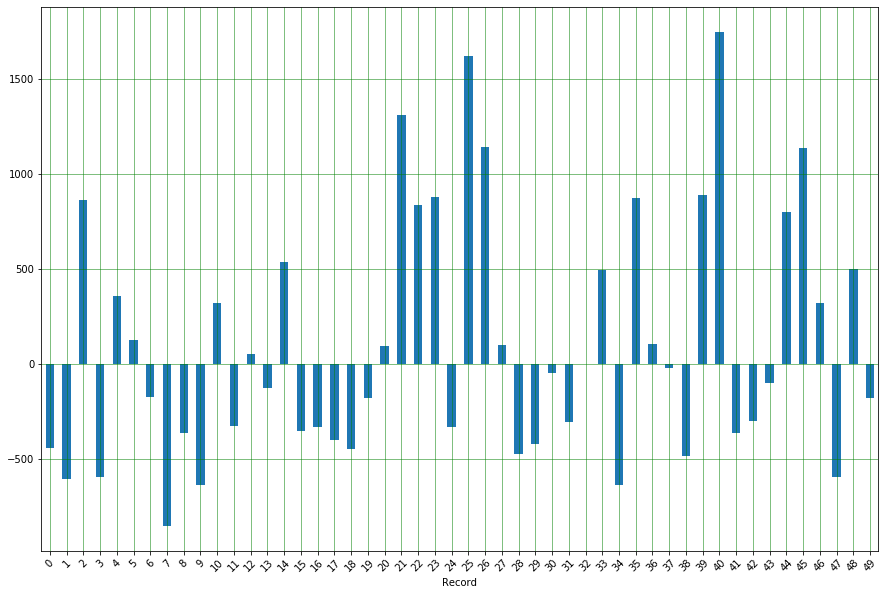

In [16]:
error = df1['Actual'] - df1['Predicted']

# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()

In [17]:
from sklearn.metrics import r2_score
r2_score(y_valid,y_predict)

0.7177630847829279

In [18]:
y_predict = lr.predict(X_test)   
y_predict
for i in range(0,len(y_predict)):
    test_data.loc[i,'Target']=y_predict[i]


In [19]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,1124.240134
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,56.004951
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,2440.879256
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,1492.800245
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,-29.335020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,2893.564328
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,1663.428996
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,952.954252
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,-481.779532


In [20]:
test_data.to_csv(file_name, sep=',')

https://www.listendata.com/2018/01/linear-regression-in-python.html